In [20]:
import pymongo
from pymongo import MongoClient

In [21]:
client         = MongoClient(host="127.0.0.1", port=27017)
base_de_donnee = client.rates
collection     = base_de_donnee.rates

In [22]:
list(collection.find())

[{'_id': ObjectId('5c38515243b3e904d4c127aa'), 'test': 'e'}]

In [23]:
import pandas as pd

In [62]:
list(range(1,12))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [52]:
annees = range(2018, 2019+1)
mois   = range(   1,   12+1)
jours  = range(   1,   31+1)

In [53]:
urls = []
url = "https://api.exchangeratesapi.io/{an}-{month}-{jour}"
for an in annees:
    for month in mois:
        for jour in jours:
            urls.append(url.format(**locals()))

In [54]:
def get_rating(url):
    try    : return pd.read_json(url)
    except : print("pbm with %s"%url)

In [58]:
dfs =  [get_rating(url) for url in urls]

In [59]:
[collection.insert_one(df.to_dict()) for df in dfs];

In [107]:
debut = "1980-01-01"
fin   = "2020-01-01"
url   = "https://api.exchangeratesapi.io/history?start_at={debut}&end_at={fin}".format(**locals())

In [229]:
df        = get_rating(url)
serie     = df["rates"].apply(lambda x: pd.DataFrame.from_dict(x, orient="index"))
df3       = pd.concat(serie.values, axis=1).T
df3.index = serie.index

/Users/romain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


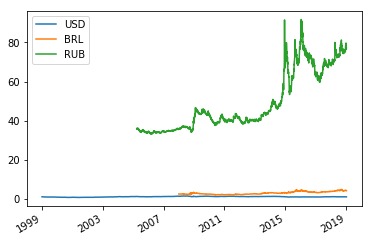

In [230]:
%matplotlib inline
df3[["USD", "BRL", "RUB"]].plot()

In [231]:
import numpy
df_ecrase = df3.applymap(lambda taux :numpy.log(1+taux))

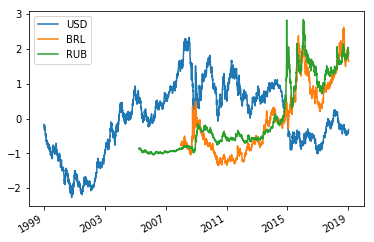

In [232]:
normalized_df=(df3-df3.mean())/df3.std()
normalized_df[["USD", "BRL", "RUB"]].plot()

# Dataframe avec index sous forme de date

In [233]:
df3.index = df3.index.to_pydatetime()

# Prédiction du dollars

In [234]:
taux_a_predire = df3.USD

# faire un décalage d'un jour sur le dollar

In [262]:
def prepare_matrice(nb_jour_a_l_avance, df3):
    tmp      = list(df3.USD.values)
    decalage = nb_jour_a_l_avance
    tmp2     = tmp +[0]*decalage 
    df3['Y'] = tmp2[decalage:]
    df4      = df3.drop(df3.index.values[-decalage:], axis=0)
    df5      = df4.fillna(0)
    return df5

In [268]:
test

,AUD,BGN,BRL,CAD,CHF,CNY,CYP,CZK,DKK,EEK,...,SGD,SIT,SKK,THB,TRL,TRY,USD,ZAR,USD_+1,Y
1999-01-04,1.9100,0.0000,0.0000,1.8004,1.6168,0.0000,0.58231,35.107,7.4501,15.6466,...,1.9554,189.0450,42.991,0.000,372274.0,0.0000,1.1789,6.9358,1.1744,1.1653
1999-01-05,1.8944,0.0000,0.0000,1.7965,1.6123,0.0000,0.58230,34.917,7.4495,15.6466,...,1.9655,188.7750,42.848,0.000,372816.0,0.0000,1.1790,6.7975,1.1653,1.1626
1999-01-06,1.8820,0.0000,0.0000,1.7711,1.6116,0.0000,0.58200,34.850,7.4452,15.6466,...,1.9699,188.7000,42.778,0.000,372188.0,0.0000,1.1743,6.7307,1.1626,1.1612
1999-01-07,1.8474,0.0000,0.0000,1.7602,1.6165,0.0000,0.58187,34.886,7.4431,15.6466,...,1.9436,188.8000,42.765,0.000,370147.0,0.0000,1.1632,6.8283,1.1612,1.1616
1999-01-08,1.8406,0.0000,0.0000,1.7643,1.6138,0.0000,0.58187,34.938,7.4433,15.6466,...,1.9537,188.8400,42.560,0.000,371830.0,0.0000,1.1659,6.7855,1.1616,1.1575
1999-01-11,1.8134,0.0000,0.0000,1.7463,1.6104,0.0000,0.58167,35.173,7.4433,15.6466,...,1.9358,188.9655,42.509,0.000,372471.0,0.0000,1.1569,6.7910,1.1575,1.1572
1999-01-12,1.8090,0.0000,0.0000,1.7392,1.6072,0.0000,0.58140,35.250,7.4430,15.6466,...,1.9343,189.5352,42.490,0.000,372105.0,0.0000,1.1520,6.9581,1.1572,1.1567
1999-01-13,1.8620,0.0000,0.0000,1.8123,1.5931,0.0000,0.58190,36.113,7.4432,15.6466,...,1.9815,191.2016,42.794,0.000,376350.0,0.0000,1.1744,7.2543,1.1567,1.1584
1999-01-14,1.8353,0.0000,0.0000,1.7707,1.5934,0.0000,0.58190,35.698,7.4437,15.6466,...,1.9615,188.9441,42.757,0.000,375101.0,0.0000,1.1653,7.1316,1.1584,1.1582
1999-01-15,1.8388,0.0000,0.0000,1.7797,1.5984,0.0000,0.58187,35.860,7.4441,15.6466,...,1.9570,187.1333,42.738,0.000,374193.0,0.0000,1.1626,7.2197,1.1582,1.1529


In [275]:
performances = []
for nb_jour_a_l_avance in range(1, 100):
    test =  prepare_matrice(nb_jour_a_l_avance, df3)
    print(test.shape)
    score = predire_2(test)
    performances.append({"nb_jour_a_l_avance": nb_jour_a_l_avance,
                         "score"             : score})

(5126, 43)
(5125, 43)
(5124, 43)
(5123, 43)
(5122, 43)
(5121, 43)
(5120, 43)
(5119, 43)
(5118, 43)
(5117, 43)
(5116, 43)
(5115, 43)
(5114, 43)
(5113, 43)
(5112, 43)
(5111, 43)
(5110, 43)
(5109, 43)
(5108, 43)
(5107, 43)
(5106, 43)
(5105, 43)
(5104, 43)
(5103, 43)
(5102, 43)
(5101, 43)
(5100, 43)
(5099, 43)
(5098, 43)
(5097, 43)
(5096, 43)
(5095, 43)
(5094, 43)
(5093, 43)
(5092, 43)
(5091, 43)
(5090, 43)
(5089, 43)
(5088, 43)
(5087, 43)
(5086, 43)
(5085, 43)
(5084, 43)
(5083, 43)
(5082, 43)
(5081, 43)
(5080, 43)
(5079, 43)
(5078, 43)
(5077, 43)
(5076, 43)
(5075, 43)
(5074, 43)
(5073, 43)
(5072, 43)
(5071, 43)
(5070, 43)
(5069, 43)
(5068, 43)
(5067, 43)
(5066, 43)
(5065, 43)
(5064, 43)
(5063, 43)
(5062, 43)
(5061, 43)
(5060, 43)
(5059, 43)
(5058, 43)
(5057, 43)
(5056, 43)
(5055, 43)
(5054, 43)
(5053, 43)
(5052, 43)
(5051, 43)
(5050, 43)
(5049, 43)
(5048, 43)
(5047, 43)
(5046, 43)
(5045, 43)
(5044, 43)
(5043, 43)
(5042, 43)
(5041, 43)
(5040, 43)
(5039, 43)
(5038, 43)
(5037, 43)
(5036, 43)

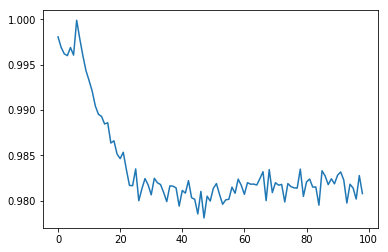

In [276]:
pd.DataFrame(performances)["score"].plot()

# dropper le dernier jour 

# Modéliser

In [254]:
def predire_2(df5):
    from sklearn.model_selection import train_test_split
    X = df5[df5.columns[:-1]]
    Y = df5[df5.columns[ -1]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    from sklearn.ensemble import GradientBoostingRegressor as reg
    algo = reg()
    model = algo.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

In [226]:
features_importances = list(zip(X_train.columns, model.feature_importances_))

In [227]:
sorted(features_importances, key=lambda data_tuple :data_tuple[1], reverse=True)

[('USD', 0.3251772914036223),
 ('HKD', 0.15292388361162534),
 ('AUD', 0.04978452089635826),
 ('PLN', 0.04255819786782463),
 ('GBP', 0.038156172600289084),
 ('CHF', 0.036489669868174764),
 ('CAD', 0.032973532676546694),
 ('CZK', 0.03140240924660095),
 ('SEK', 0.024917521371010446),
 ('NZD', 0.023152667233923507),
 ('JPY', 0.021777975304540124),
 ('LVL', 0.02068158446776752),
 ('ZAR', 0.014761330283619074),
 ('ISK', 0.014400446239537202),
 ('HRK', 0.011554161878579041),
 ('BRL', 0.01131786331090246),
 ('SGD', 0.010964798326025734),
 ('CNY', 0.010834255619016771),
 ('IDR', 0.01029060414533693),
 ('ROL', 0.009768333037641191),
 ('KRW', 0.009633936280411991),
 ('SKK', 0.009567783464216563),
 ('MYR', 0.009383268010287226),
 ('DKK', 0.009110288702142198),
 ('RUB', 0.008460972687901101),
 ('HUF', 0.006810532235137576),
 ('NOK', 0.006782350881132254),
 ('CYP', 0.006662883898599274),
 ('TRL', 0.006372469840904299),
 ('MTL', 0.005369229115168181),
 ('TRY', 0.0050887520595365235),
 ('INR', 0.00431